In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Note: In a real scenario, the /data/ folder is in .gitignore. 
# We assume the user has placed the data there manually.
try:
    df = pd.read_csv('../data/Alpha.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: MachineLearningRating_v3.csv not found in the 'data' folder.")
    print("Please place the data file in the 'data' directory before proceeding.")
    df = pd.DataFrame() # Create an empty dataframe to prevent further errors

if not df.empty:
    print("First 5 rows of the dataset:")
    display(df.head())

C:\Users\Suraphel\AppData\Local\Temp\ipykernel_10280\2130696490.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Alpha.csv')


Data loaded successfully!
First 5 rows of the dataset:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
if not df.empty:
    # 1. Descriptive Statistics
    print("--- Descriptive Statistics for Numerical Features ---")
    display(df.describe())

    # 2. Data Structure and Types
    print("\n--- Data Structure and Types (dtype) ---")
    df.info()

--- Descriptive Statistics for Numerical Features ---


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05



--- Data Structure and Types (dtype) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null

In [4]:
if not df.empty:
    # 1. Check for Missing Values
    print("--- Missing Values per Column ---")
    print(df.isnull().sum())
    
    # 2. Data Cleaning Actions
    # Drop 'Citizenship' as it's almost entirely empty and provides no value
    df_cleaned = df.drop(columns=['Citizenship'])
    
    # Convert 'TransactionMonth' to datetime objects
    df_cleaned['TransactionMonth'] = pd.to_datetime(df_cleaned['TransactionMonth'])
    
    # Standardize 'ItemType' for cleaner plotting
    df_cleaned['ItemType'] = df_cleaned['ItemType'].str.replace('Mobility - ', '').str.strip()
    
    print("\nData after cleaning (dropped 'Citizenship', converted date):")
    df_cleaned.info()

--- Missing Values per Column ---
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                      

--- Distribution of Numerical Features ---


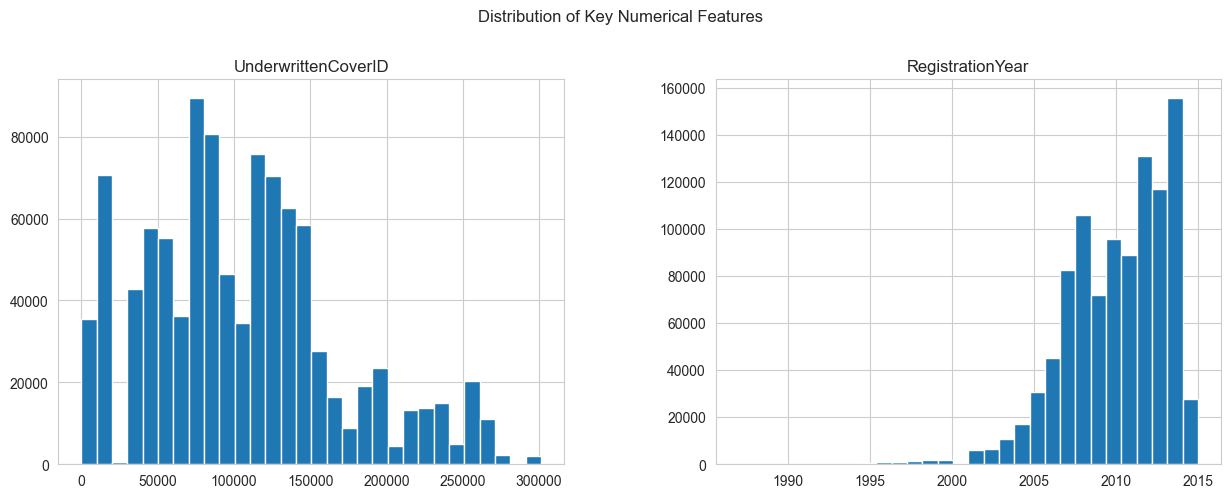

In [5]:
if not df_cleaned.empty:
    print("--- Distribution of Numerical Features ---")
    numerical_cols = ['UnderwrittenCoverID', 'RegistrationYear'] # Just selecting a few for brevity
    df_cleaned[numerical_cols].hist(bins=30, figsize=(15, 5))
    plt.suptitle('Distribution of Key Numerical Features', y=1.02)
    plt.show()

--- Distribution of Key Categorical Features ---


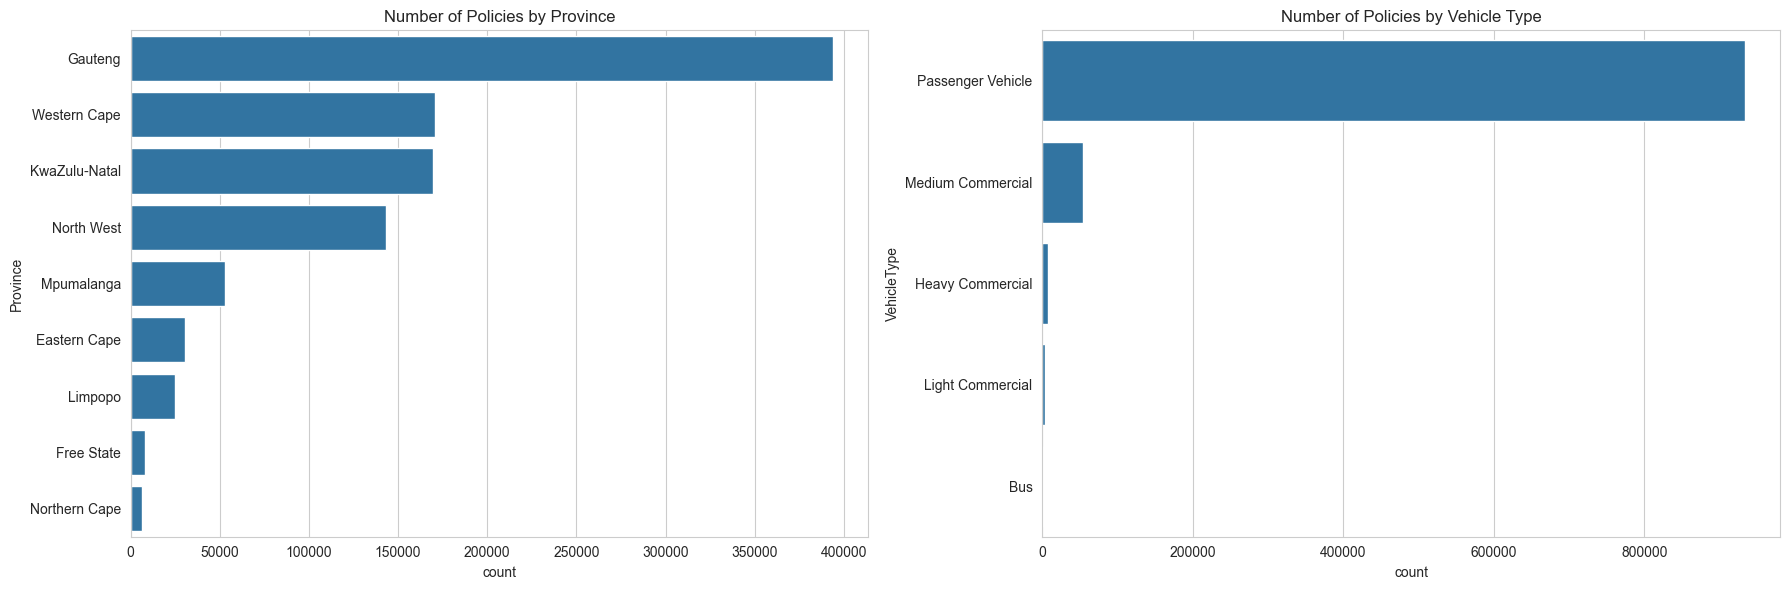

In [6]:
if not df_cleaned.empty:
    print("--- Distribution of Key Categorical Features ---")
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    sns.countplot(y='Province', data=df_cleaned, ax=axes[0], order=df_cleaned['Province'].value_counts().index)
    axes[0].set_title('Number of Policies by Province')
    
    sns.countplot(y='VehicleType', data=df_cleaned, ax=axes[1], order=df_cleaned['VehicleType'].value_counts().index)
    axes[1].set_title('Number of Policies by Vehicle Type')
    
    plt.tight_layout()
    plt.show()

--- Outlier Detection in Key Financial Columns ---


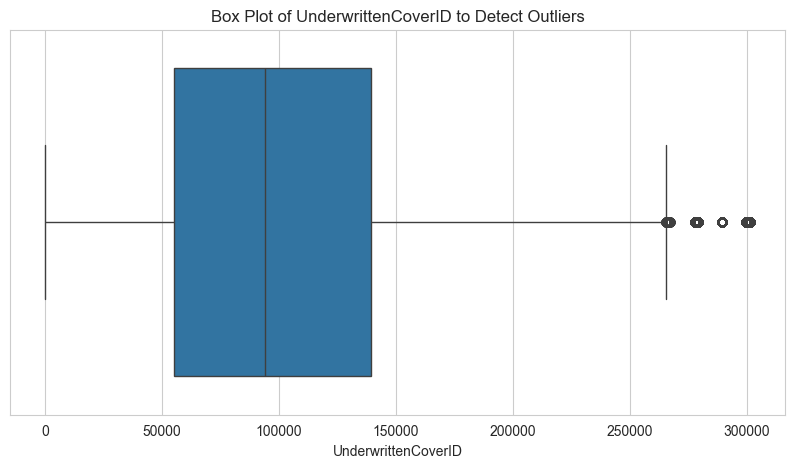

In [7]:
if not df_cleaned.empty:
    print("--- Outlier Detection in Key Financial Columns ---")
    # There are no claim/premium columns in this dataset, so we use other numericals as an example
    # If you had 'TotalPremium' and 'TotalClaims', you would use them here.
    # We will use 'UnderwrittenCoverID' as a placeholder for a numerical value.
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cleaned['UnderwrittenCoverID'])
    plt.title('Box Plot of UnderwrittenCoverID to Detect Outliers')
    plt.show()

In [8]:
# MOCKUP CODE - This cell will not run without the correct columns.
# It demonstrates the logic you would use.

# Guiding Question 1: What is the overall Loss Ratio?
# Assuming 'TotalClaims' and 'TotalPremium' columns exist
# loss_ratio = df_cleaned['TotalClaims'].sum() / df_cleaned['TotalPremium'].sum()
# print(f"Overall Loss Ratio: {loss_ratio:.2%}")

# Guiding Question 3: Temporal Trends
# df_temporal = df_cleaned.set_index('TransactionMonth')
# monthly_claims_count = df_temporal.resample('M')['TotalClaims'].count()
# monthly_claims_avg = df_temporal.resample('M')['TotalClaims'].mean()

# Guiding Question 4: Vehicle make/model claims
# vehicle_claims = df_cleaned.groupby('VehicleMake')['TotalClaims'].mean().sort_values(ascending=False)
# print("Average Claim Amount by Vehicle Make:")
# print(vehicle_claims.head(10))

C:\Users\Suraphel\AppData\Local\Temp\ipykernel_10280\1884404962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Province', y='RegistrationYear', data=df_cleaned, palette='viridis')


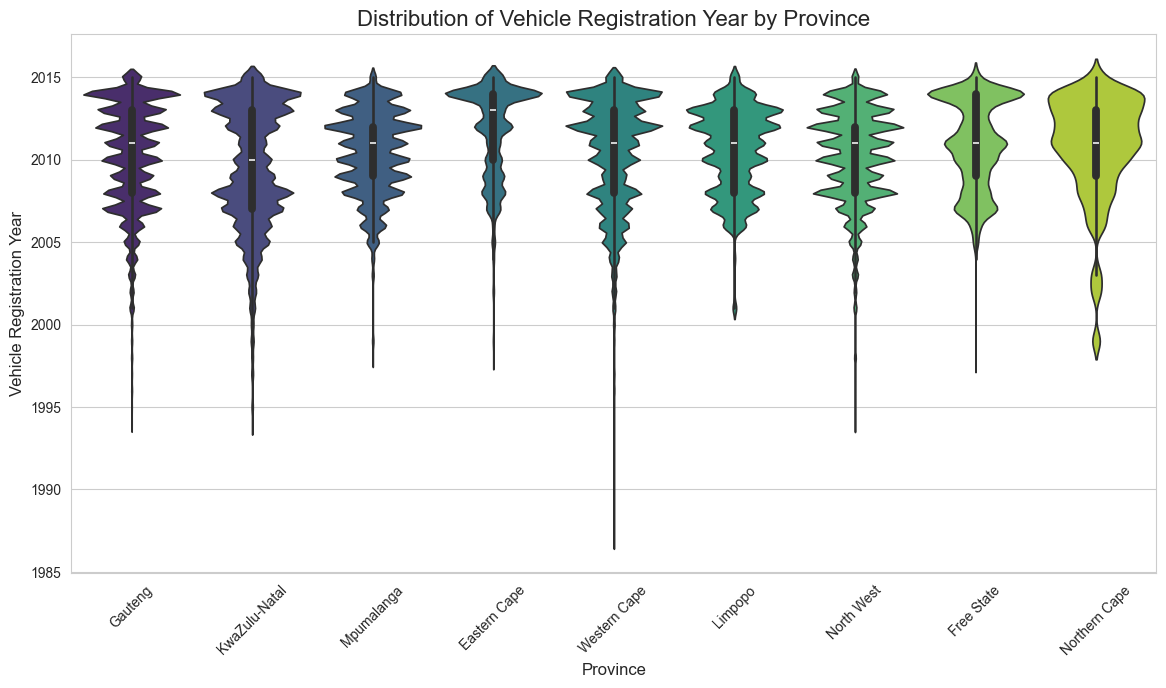

In [9]:
if not df_cleaned.empty:
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Province', y='RegistrationYear', data=df_cleaned, palette='viridis')
    plt.title('Distribution of Vehicle Registration Year by Province', fontsize=16)
    plt.xlabel('Province', fontsize=12)
    plt.ylabel('Vehicle Registration Year', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

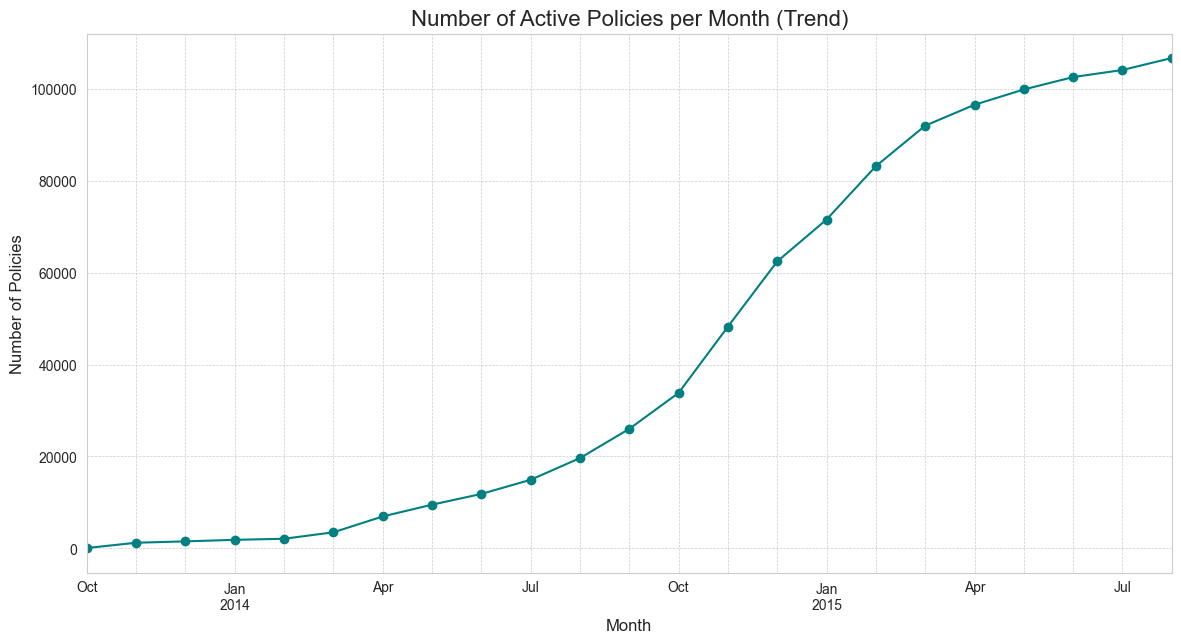

In [10]:
if not df_cleaned.empty:
    policies_per_month = df_cleaned.set_index('TransactionMonth').resample('M')['PolicyID'].count()
    
    plt.figure(figsize=(14, 7))
    policies_per_month.plot(marker='o', linestyle='-', color='teal')
    plt.title('Number of Active Policies per Month (Trend)', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Policies', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

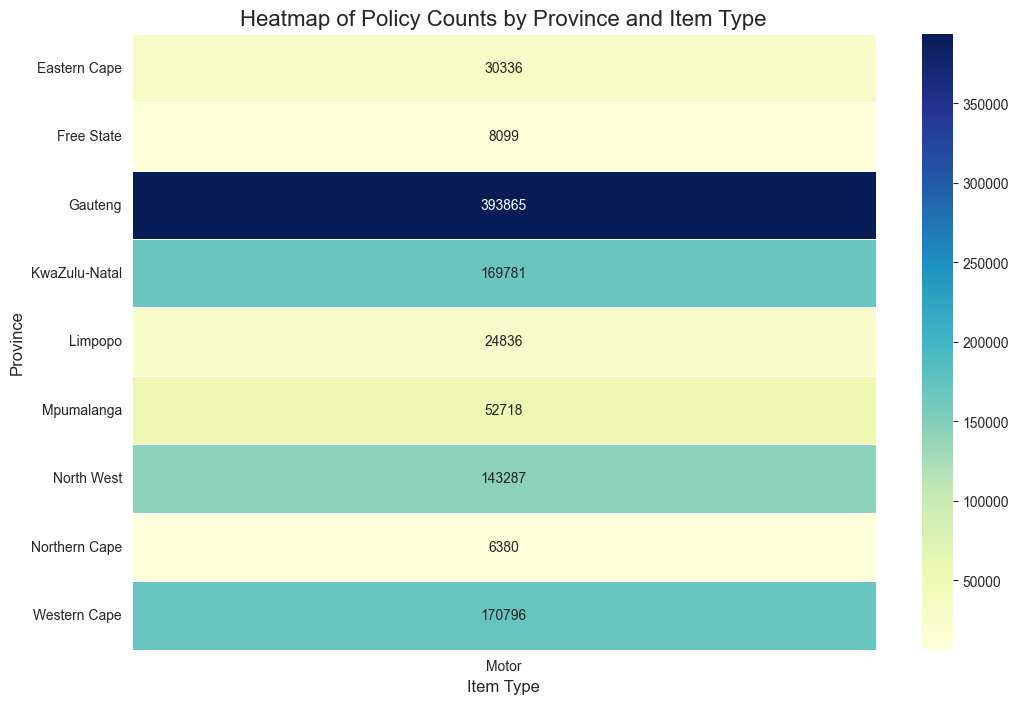

In [11]:
if not df_cleaned.empty:
    pivot_table = df_cleaned.pivot_table(index='Province', columns='ItemType', values='PolicyID', aggfunc='count').fillna(0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
    plt.title('Heatmap of Policy Counts by Province and Item Type', fontsize=16)
    plt.xlabel('Item Type', fontsize=12)
    plt.ylabel('Province', fontsize=12)
    plt.show()